In [72]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Position in Navigation, Coordinate Systems

Positional data are determined, processed, transferred, and presented in a variety of coordinate systems based on the purpose of use and the method of acquisition.

Within navigational applications, coordinate systems (coordinate frames) can be divided into two main categories:

- Systems based on the Cartesian coordinate system
- Systems based on angular information

## The first category (Systems based on the Cartesian coordinate system) includes:

- **ECI (Earth Centered Inertial)** - An inertial system connected to the Earth's center of mass and fixed relative to the stars and celestial objects.
- **ECEF (Earth Centered Earth Fixed)** - A system connected to the Earth's center of mass and fixed relative to the meridians and parallels (equator).
- **ENU (East North Up)** - A system connected to a specific point and Cartesian axes relative to this point. This system can describe the relative position of a point on the Earth's surface as well as within a local coordinate system, for example, on an airplane or ship. A similar system is NED (North East Down). Both are designed to be right-handed coordinate systems.

## The second category (Systems based on angular information) includes:

ellipsoidal coordinates, such as geodetic coordinates, also referred to as **LLH (Latitude, Longitude, Height)**, indicating latitude, longitude, and height above the ellipsoid. They are also denoted as φ, λ, h.

**Latitude (φ)**: This is a measure of how far north or south a point is from the Equator. Latitude is expressed in degrees, with the Equator at 0°, the North Pole at 90° north, and the South Pole at 90° south. Positive 
values denote the northern hemisphere, and negative values denote the southern hemisphere.

**Longitude (λ)**: This measures how far east or west a point is from the prime meridian, which is an arbitrary line chosen to be the Earth's zero of longitude, passing through Greenwich, England. Longitude is also 
expressed in degrees, with values ranging from -180° to 180°. Positive values denote east of the prime meridian, and negative values denote west.

**Altitude (h)**: This is the distance of a point above or below the ellipsoid surface. Height is measured along the normal to the ellipsoid surface, which may not necessarily be perpendicular to the Earth's actual surface 
due to its irregularities. This is different from the elevation or altitude above mean sea level, as mean sea level itself can vary significantly from the ellipsoid model. Height can be positive or negative, with positive 
values indicating positions above the ellipsoid and negative values indicating positions below it.

---

## Cartesian and Ellipsoidal Coordinate System

Conversions between coordinate systems are typically realized by a set of transformation equations, based on shifts, rotations, and projections.

### 1. Conversion from Geodetic to ECEF Coordinates

Cartesian coordinates (x, y, z) can be obtained from geodetic coordinates (φ, λ, h) by the following transformation:

$$
x = (N + h) \cos(\phi) \cos(\lambda) \\
y = (N + h) \cos(\phi) \sin(\lambda) \\
z = ((1 - e^2) N + h) \sin(\phi)
$$

where N is the radius of curvature in the prime vertical:

$$
N = \frac{a}{\sqrt{1 - e^2 \sin^2 \phi}}
$$

and e is the eccentricity based on the ellipsoid parameters (major axis a, minor axis b, and flattening factor f):

$$
f = 1 - \frac{b}{a}, e^2 = \frac{a^2 - b^2}{a^2} = 2f - f^2
$$

### 2. Conversion from ECEF to Geodetic Coordinates

Geodetic coordinates (φ, λ, h) are obtained from Cartesian coordinates (x, y, z) by the following procedure:

$$
\lambda = \text{atan}\left(\frac{y}{x}\right)
$$

Longitude and height above the ellipsoid are then determined by an iterative process.

Initial values are set as follows:

$$
\phi_0 = \text{atan}\left(\frac{z}{(1 - e^2) p}\right), \quad p = \sqrt{x^2 + y^2}
$$

Then proceed with iteration, where in each step we compute the values:

$$
N_i = \frac{a}{\sqrt{1 - e^2 \sin^2(\phi_{i-1})}} \\
h_i = \frac{p}{\cos(\phi_{i-1})} - N_i \\
\phi_i = \text{atan}\left(\frac{z}{(1 - e^2 \frac{N_i}{N_i + h_i}) p}\right)
$$

The iterative process is repeated until the difference between two values falls below the required tolerance.

### 3. Conversion between ENU and ECEF Coordinates

This involves conversion between two Cartesian coordinate systems, and can therefore be realized by a set of mutual shifts and rotations of both systems.

---

# Load the Matlab file

Use the scipy library to load the Matlab file. The file contains a dictionary with the keys 'xyz_record'. The values are the data we want to extract.

In [73]:
positions = sp.io.loadmat('matlab/position_ecef.mat')
print(positions.keys())
print(positions.values())
print(positions['xyz_record'])

dict_keys(['__header__', '__version__', '__globals__', 'xyz_record'])
dict_values([b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Apr 12 22:43:07 2023', '1.0', [], array([[  49394.        , 3784411.72056683,  898803.86212866,
        5037954.83682407],
       [  49395.        , 3784411.99379239,  898802.90354354,
        5037954.80282927],
       [  49399.        , 3784413.78162806,  898797.16957373,
        5037954.48495753],
       ...,
       [  55547.        , 3784143.91929821,  899627.93882413,
        5038012.83110467],
       [  55548.        , 3784145.94593751,  899621.32017003,
        5038012.24097176],
       [  55553.        , 3784155.42453832,  899585.00094126,
        5038011.61092784]])])
[[  49394.         3784411.72056683  898803.86212866 5037954.83682407]
 [  49395.         3784411.99379239  898802.90354354 5037954.80282927]
 [  49399.         3784413.78162806  898797.16957373 5037954.48495753]
 ...
 [  55547.         3784143.91929821  899627.93882413 50380

# Transform the data into a pandas DataFrame

The data is stored in a 3D array. We need to transform it into a 2D array to be able to create a pandas DataFrame. The first dimension is the time, the second dimension is the x, y, and z coordinates.

In [74]:
data = [[row.flat[0] for row in line] for line in positions['xyz_record']]
columns = ['time [s]', 'x [m]', 'y [m]', 'z [m]']
df = pd.DataFrame(data, columns=columns)
print(df)

      time [s]         x [m]          y [m]         z [m]
0      49394.0  3.784412e+06  898803.862129  5.037955e+06
1      49395.0  3.784412e+06  898802.903544  5.037955e+06
2      49399.0  3.784414e+06  898797.169574  5.037954e+06
3      49406.0  3.784420e+06  898781.624978  5.037953e+06
4      49410.0  3.784426e+06  898765.774420  5.037952e+06
...        ...           ...            ...           ...
2077   55538.0  3.784126e+06  899682.632374  5.038017e+06
2078   55539.0  3.784128e+06  899676.508055  5.038016e+06
2079   55547.0  3.784144e+06  899627.938824  5.038013e+06
2080   55548.0  3.784146e+06  899621.320170  5.038012e+06
2081   55553.0  3.784155e+06  899585.000941  5.038012e+06

[2082 rows x 4 columns]


# Visualize the ECEF coordinates

### Basic 3D Trajectory Plot

A straightforward approach to visualize the trajectory is to use a 3D scatter or line plot. This can be done using the matplotlib library's Axes3D module.

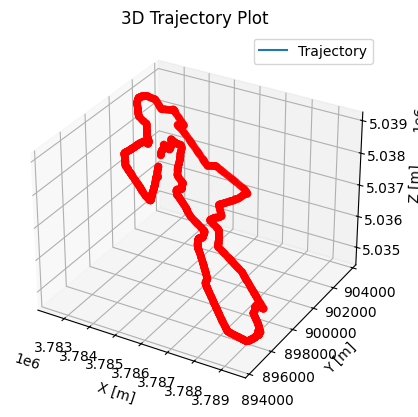

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the trajectory
ax.plot(df['x [m]'], df['y [m]'], df['z [m]'], label='Trajectory')
ax.scatter(df['x [m]'], df['y [m]'], df['z [m]'], color='red')  # To mark the points

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_title('3D Trajectory Plot')
ax.legend()

plt.show()

### Interactive 3D Plot with Plotly

For a more interactive visualization, consider using Plotly, which allows you to zoom, pan, and rotate the trajectory in 3D space. This can provide better insights, especially for complex trajectories.

In [76]:
# Adjust these values to change the figure size
figure_width = 1000  # in pixels
figure_height = 1000  # in pixels

# Creating a 3D plot with adjusted figure size
fig = go.Figure(data=[go.Scatter3d(
    x=df['x [m]'],
    y=df['y [m]'],
    z=df['z [m]'],
    mode='lines+markers',
    marker=dict(
        size=4,
        color=df['time [s]'],  # Color points by time for additional context
        colorscale='Viridis',
        opacity=0.8
    ),
    line=dict(
        color='darkblue',
        width=2
    )
)])

fig.update_layout(title='3D Trajectory Plot',
                  scene=dict(
                      xaxis_title='X [m]',
                      yaxis_title='Y [m]',
                      zaxis_title='Z [m]'
                  ),
                  width=figure_width,  # Set the figure width
                  height=figure_height  # Set the figure height
                  )
fig.show()


### Time-Series Analysis

If you're interested in how each coordinate changes over time, consider plotting each ECEF coordinate against time in separate 2D plots. This can be useful for analyzing the dynamics of the object's motion over time.

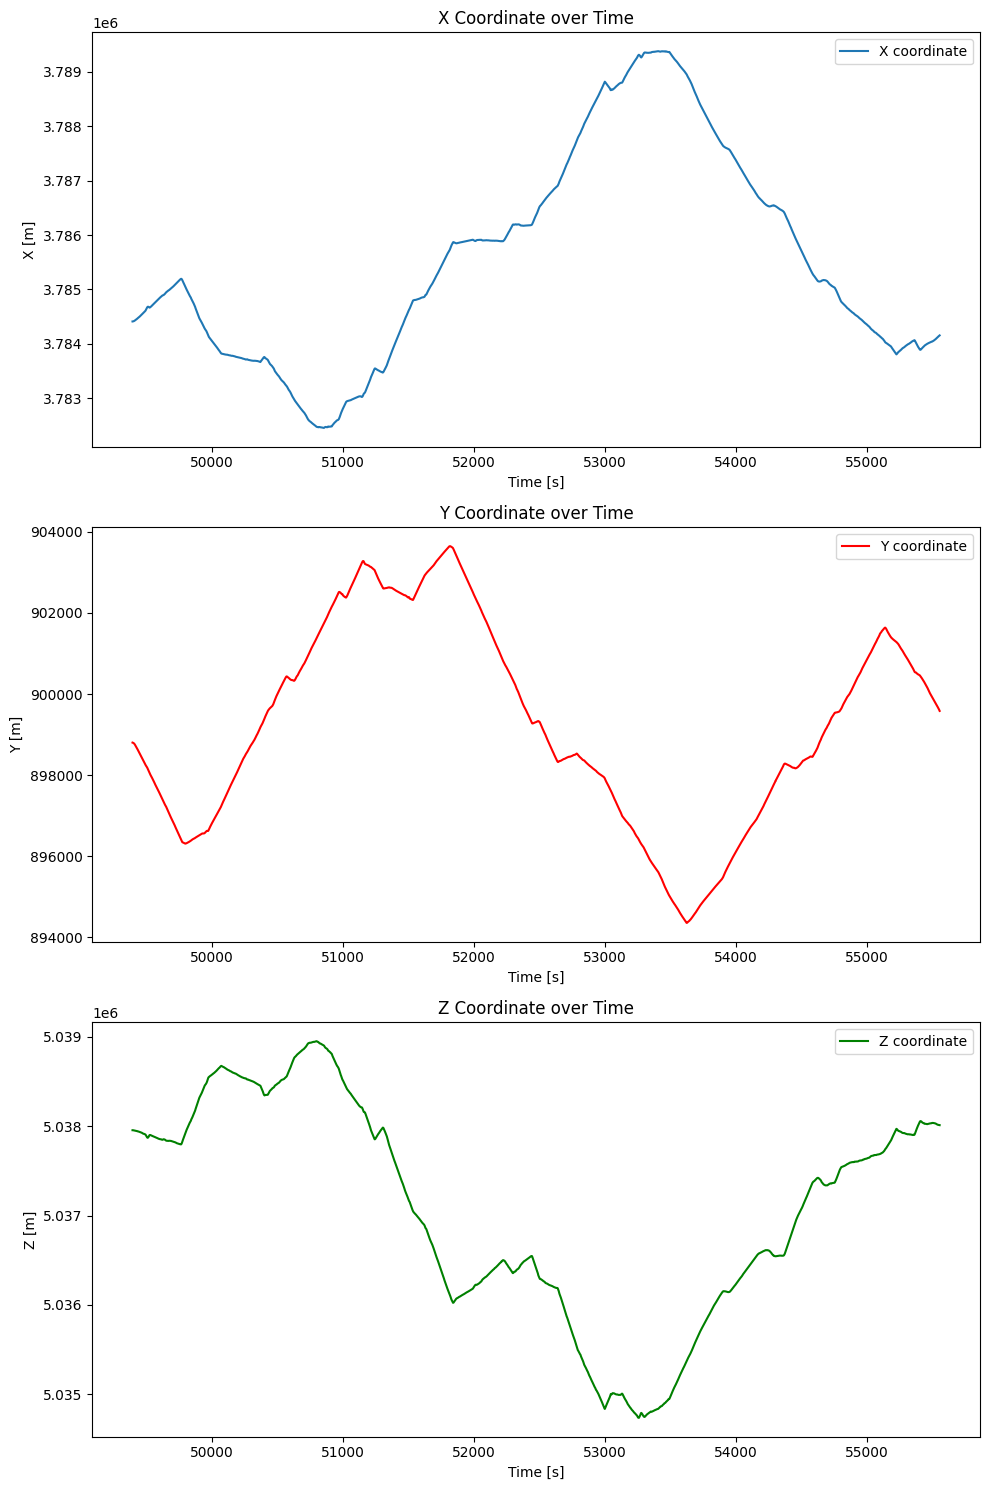

In [77]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(df['time [s]'], df['x [m]'], label='X coordinate')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('X [m]')
ax[0].set_title('X Coordinate over Time')
ax[0].legend()

ax[1].plot(df['time [s]'], df['y [m]'], label='Y coordinate', color='red')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Y [m]')
ax[1].set_title('Y Coordinate over Time')
ax[1].legend()

ax[2].plot(df['time [s]'], df['z [m]'], label='Z coordinate', color='green')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Z [m]')
ax[2].set_title('Z Coordinate over Time')
ax[2].legend()

plt.tight_layout()
plt.show()

### Convert ECEF Coordinates to Geodetic Coordinates

ECEF (Earth-Centered, Earth-Fixed) coordinates are not as intuitive as geodetic coordinates (latitude, longitude, altitude) for visualizing trajectories on maps. To convert ECEF coordinates to geodetic coordinates, you can use the pyproj library, which provides tools for geospatial data transformations.

In [78]:
from pyproj import Transformer
# Create a transformer from ECEF (EPSG:4978) to WGS84 geodetic coordinates (EPSG:4326)
transformer = Transformer.from_crs('epsg:4978', 'epsg:4326')

# Apply transformation to each row in the DataFrame
df[['longitude', 'latitude', 'altitude']] = df.apply(
    lambda row: transformer.transform(row['x [m]'], row['y [m]'], row['z [m]']),
    axis=1, result_type='expand')

print(df)

      time [s]         x [m]          y [m]         z [m]  longitude  \
0      49394.0  3.784412e+06  898803.862129  5.037955e+06  52.515151   
1      49395.0  3.784412e+06  898802.903544  5.037955e+06  52.515150   
2      49399.0  3.784414e+06  898797.169574  5.037954e+06  52.515145   
3      49406.0  3.784420e+06  898781.624978  5.037953e+06  52.515119   
4      49410.0  3.784426e+06  898765.774420  5.037952e+06  52.515100   
...        ...           ...            ...           ...        ...   
2077   55538.0  3.784126e+06  899682.632374  5.038017e+06  52.516026   
2078   55539.0  3.784128e+06  899676.508055  5.038016e+06  52.516013   
2079   55547.0  3.784144e+06  899627.938824  5.038013e+06  52.515967   
2080   55548.0  3.784146e+06  899621.320170  5.038012e+06  52.515961   
2081   55553.0  3.784155e+06  899585.000941  5.038012e+06  52.515951   

       latitude  altitude  
0     13.360306      80.8  
1     13.360291      80.8  
2     13.360203      80.8  
3     13.359959      80

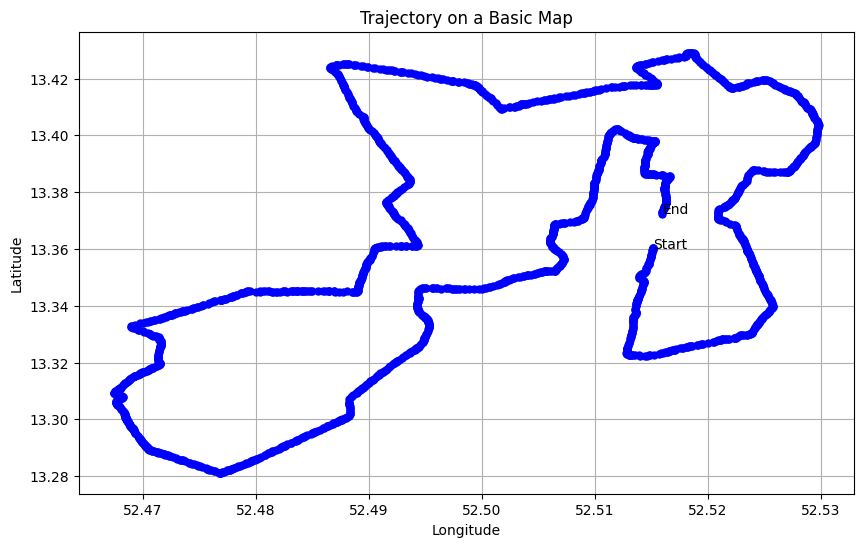

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(df['longitude'], df['latitude'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Trajectory on a Basic Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Optional: Annotate start and end points
plt.annotate('Start', (df.iloc[0]['longitude'], df.iloc[0]['latitude']))
plt.annotate('End', (df.iloc[-1]['longitude'], df.iloc[-1]['latitude']))

plt.show()


In [85]:
import folium

# Create a map centered around the average coordinates
m = folium.Map(location=[df['longitude'].mean(), df['latitude'].mean()], zoom_start=15)

# Plot each point in the DataFrame
for _, row in df.iterrows():
    folium.CircleMarker(location=[row['longitude'], row['latitude']],
                        radius=4,
                        color='red',
                        fill=True).add_to(m)

# Display the map
m


### Convert to ENUs (East, North, Up) Coordinates

Another common coordinate system used in navigation and robotics is the East-North-Up (ENU) coordinate system. This system is often used to describe the position of an object relative to a local reference frame. To convert ECEF coordinates to ENU coordinates, you can use the pyproj library.

In [81]:
from pyproj import Transformer

# Reference point (first row in your DataFrame)
ref_lon, ref_lat, ref_alt = df.iloc[0][['longitude', 'latitude', 'altitude']]

# Creating a transformer for WGS84 to Azimuthal Equidistant centered at the reference point
transformer_aeqd = Transformer.from_crs(
    f'epsg:4326',  # Source CRS (Geodetic lat-lon)
    f'+proj=aeqd +lat_0={ref_lat} +lon_0={ref_lon} +datum=WGS84',  # Dest. CRS (Azimuthal Equidistant)
    always_xy=True,
)

# Apply transformation to get 'distance east' and 'distance north' from reference point
df[['east [m]', 'north [m]']] = df.apply(
    lambda row: transformer_aeqd.transform(row['longitude'], row['latitude']),
    axis=1, result_type='expand'
)

# The altitude difference from the reference point (simple subtraction)
df['up [m]'] = df['altitude'] - ref_alt

print(df)


      time [s]         x [m]          y [m]         z [m]  longitude  \
0      49394.0  3.784412e+06  898803.862129  5.037955e+06  52.515151   
1      49395.0  3.784412e+06  898802.903544  5.037955e+06  52.515150   
2      49399.0  3.784414e+06  898797.169574  5.037954e+06  52.515145   
3      49406.0  3.784420e+06  898781.624978  5.037953e+06  52.515119   
4      49410.0  3.784426e+06  898765.774420  5.037952e+06  52.515100   
...        ...           ...            ...           ...        ...   
2077   55538.0  3.784126e+06  899682.632374  5.038017e+06  52.516026   
2078   55539.0  3.784128e+06  899676.508055  5.038016e+06  52.516013   
2079   55547.0  3.784144e+06  899627.938824  5.038013e+06  52.515967   
2080   55548.0  3.784146e+06  899621.320170  5.038012e+06  52.515961   
2081   55553.0  3.784155e+06  899585.000941  5.038012e+06  52.515951   

       latitude  altitude   east [m]    north [m]  up [m]  
0     13.360306      80.8   0.000000     0.000000     0.0  
1     13.360291

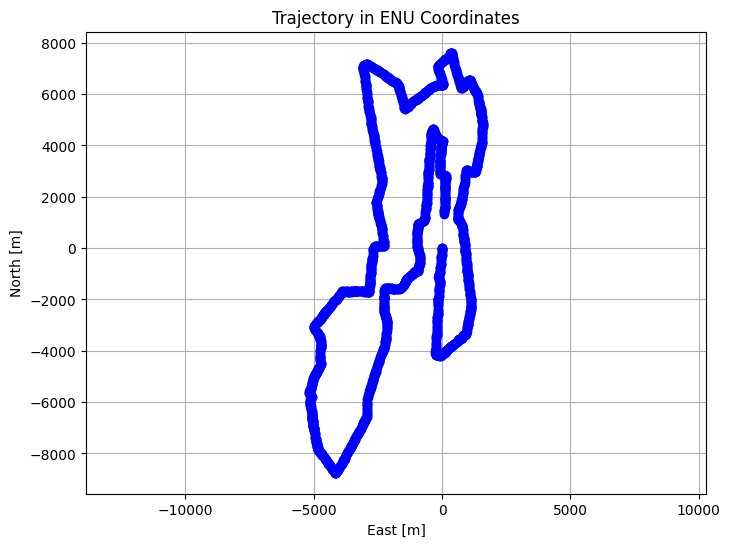

In [82]:
plt.figure(figsize=(8, 6))
plt.plot(df['east [m]'], df['north [m]'], marker='o', linestyle='-', color='blue')
plt.title('Trajectory in ENU Coordinates')
plt.xlabel('East [m]')
plt.ylabel('North [m]')
plt.axis('equal')
plt.grid(True)
plt.show()

### Speed and altitude profile analysis

You can calculate the speed of the object by taking the derivative of the position with respect to time. This will give you the velocity vector at each time step. You can also analyze the altitude profile to understand how the object's altitude changes over time.

In [83]:
# Calculate the time differences in seconds
df['time_diff'] = df['time [s]'].diff()

# Calculate altitude differences in meters
df['altitude_diff'] = df['altitude'].diff()

# Calculate vertical speed in m/s (altitude difference divided by time difference)
df['vertical_speed'] = df['altitude_diff'] / df['time_diff']

# For horizontal speed, you would similarly calculate distances between points and divide by time_diff.
# This example focuses on vertical speed and altitude profile.
print(df)

      time [s]         x [m]          y [m]         z [m]  longitude  \
0      49394.0  3.784412e+06  898803.862129  5.037955e+06  52.515151   
1      49395.0  3.784412e+06  898802.903544  5.037955e+06  52.515150   
2      49399.0  3.784414e+06  898797.169574  5.037954e+06  52.515145   
3      49406.0  3.784420e+06  898781.624978  5.037953e+06  52.515119   
4      49410.0  3.784426e+06  898765.774420  5.037952e+06  52.515100   
...        ...           ...            ...           ...        ...   
2077   55538.0  3.784126e+06  899682.632374  5.038017e+06  52.516026   
2078   55539.0  3.784128e+06  899676.508055  5.038016e+06  52.516013   
2079   55547.0  3.784144e+06  899627.938824  5.038013e+06  52.515967   
2080   55548.0  3.784146e+06  899621.320170  5.038012e+06  52.515961   
2081   55553.0  3.784155e+06  899585.000941  5.038012e+06  52.515951   

       latitude  altitude   east [m]    north [m]  up [m]  time_diff  \
0     13.360306      80.8   0.000000     0.000000     0.0      

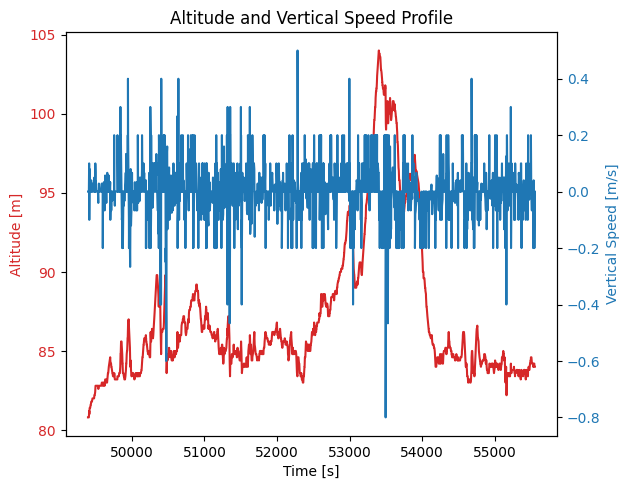

In [84]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Altitude [m]', color=color)
ax1.plot(df['time [s]'], df['altitude'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vertical Speed [m/s]', color=color)
ax2.plot(df['time [s]'], df['vertical_speed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Altitude and Vertical Speed Profile')
plt.show()